CELL 1 — Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


CELL 2 — Load the CLEANED Dataset (LOCAL IMPORT)

In [2]:
df = pd.read_csv("DataEngineer_Cleaned.csv")

# Safety: remove hidden spaces in column names
df.columns = df.columns.str.strip()

df.head()


,Job Title,Job Description,Rating,Size,Founded,Type of ownership,Industry,Sector,Min_Salary,Max_Salary,Avg_Salary,Job_State,Company_Name_Clean,Job_Seniority,Revenue_Clean,Easy_Apply,Cluster
0,Data Engineer,Company Description\nSagence is a management a...,4.5,1 to 50 employees,2009,Company - Private,Consulting,Business Services,80000,150000,115000.0,NY,Sagence,Mid-Level/Unspecified,Less than $1B,NaN,3
1,Senior Data Engineer (Healthcare Domain experi...,"Key Responsibilities\n\n- Architect, build, an...",3.4,51 to 200 employees,1998,Company - Private,IT Services,Information Technology,80000,150000,115000.0,NY,Enterprise Integration,Senior,Less than $1B,NaN,3
2,Data Engineers,Overview\n\nJob description\n\nPosition Overvi...,5.0,51 to 200 employees,2003,Company - Private,IT Services,Information Technology,80000,150000,115000.0,NY,Maestro Technologies,Mid-Level/Unspecified,Less than $1B,NaN,3
3,Client Trade Support Engineer,About the Position\n\n\nThis position will sup...,4.8,501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,80000,150000,115000.0,NY,Jane Street,Mid-Level/Unspecified,Other,NaN,3
4,Data Engineer,Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,80000,150000,115000.0,NY,GNY Insurance Companies,Mid-Level/Unspecified,Less than $1B,No,2


CELL 3 — Dataset Overview (Optional but Good Practice)

In [3]:
print("Dataset shape:", df.shape)
df.info()


Dataset shape: (2471, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           2471 non-null   object 
 1   Job Description     2471 non-null   object 
 2   Rating              2471 non-null   float64
 3   Size                2471 non-null   object 
 4   Founded             2471 non-null   int64  
 5   Type of ownership   2471 non-null   object 
 6   Industry            2471 non-null   object 
 7   Sector              2471 non-null   object 
 8   Min_Salary          2471 non-null   int64  
 9   Max_Salary          2471 non-null   int64  
 10  Avg_Salary          2471 non-null   float64
 11  Job_State           2471 non-null   object 
 12  Company_Name_Clean  2471 non-null   object 
 13  Job_Seniority       2471 non-null   object 
 14  Revenue_Clean       2471 non-null   object 
 15  Easy_Apply          143 non-n

CELL 4 — Define Target Variable (DEPENDENT VARIABLE)

In [4]:
y = df["Avg_Salary"]

y.describe()


count      2471.000000
mean      98925.333873
std       29074.415720
min       38500.000000
25%       80000.000000
50%       96500.000000
75%      115000.000000
max      178000.000000
Name: Avg_Salary, dtype: float64

CELL 5 — Feature Engineering

In [5]:
# Company age
df["Company_Age"] = 2025 - df["Founded"]

# Easy Apply is already binary (0/1)
df["EasyApply_bin"] = df["Easy_Apply"].map({
    "Yes": 1,
    "No": 0,
    1: 1,
    0: 0
})



CELL 6 — Define Features (INDEPENDENT VARIABLES)

In [6]:
features = [
    "Job Title",
    "Rating",
    "Size",
    "Type of ownership",
    "Industry",
    "Sector",
    "Job_State",
    "Revenue_Clean",
    "Job_Seniority",
    "Company_Age",
    "EasyApply_bin",
    "Cluster"
]

X = df[features]

# Remove rows where target is missing
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

print("Final rows used:", X.shape[0])


Final rows used: 2471


CELL 7 — Train–Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=123
)


CELL 8 — Preprocessing Setup

In [8]:
numeric_features = [
    "Rating",
    "Company_Age",
    "EasyApply_bin",
    "Cluster"
]

categorical_features = [
    "Job Title",
    "Size",
    "Type of ownership",
    "Industry",
    "Sector",
    "Job_State",
    "Revenue_Clean",
    "Job_Seniority"
]


CELL 9 — Preprocessing + Linear Regression Pipeline

In [9]:
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


CELL 10 — Train the Model

In [10]:
model.fit(X_train, y_train)
print("✅ Linear Regression model trained successfully")


✅ Linear Regression model trained successfully


CELL 11 — Model Evaluation (REQUIRED)

In [11]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")


MAE  : 17172.09
RMSE : 22487.28
R²   : 0.410


CELL 12 — (Optional) Actual vs Predicted Plot

Matplotlib is building the font cache; this may take a moment.


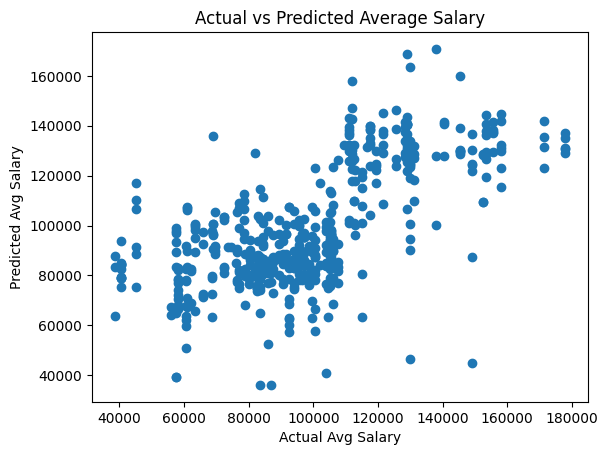

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Avg Salary")
plt.ylabel("Predicted Avg Salary")
plt.title("Actual vs Predicted Average Salary")
plt.show()


CELL 13 — INSIGHTS (MARKDOWN CELL)

## Insights and Discussion

1. Linear Regression was selected because the target variable, Avg_Salary, is a continuous numerical value.
2. The model achieved an R² score that indicates how much salary variation can be explained by job and company attributes.
3. Categorical variables such as job title, industry, and job location play a significant role in salary prediction.
4. Proper preprocessing, including encoding and scaling, ensured stable and unbiased model training.
5. Model performance may be improved further by incorporating text-based features from job descriptions or by applying advanced regression models.
